In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nxviz.plots as nv
import nxviz as nv
from nxviz import annotate
from datetime import datetime

/opt/anaconda3/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [7]:
ch_01 = pd.read_csv("/Users/hernanadasme/Documents/data_challenges/data_box/challen_01.csv")
ch_01.drop(['Unnamed: 0'], axis=1, inplace=True)

>**RENAME COLUMNS**

In [8]:
ch_01.rename({'Boxers challenging H-ID': 'challenging_id'}, axis = 1, inplace=True)
ch_01.rename({'Boxer Challenged H-ID_right': 'challenged_id'}, axis = 1, inplace=True)
ch_01.rename({'rec_Title_right': 'challenged_name'}, axis = 1, inplace=True)
ch_01.rename({'rec_Title.1_left': 'challenging_name'}, axis = 1, inplace=True)
ch_01.rename({'rec_Title_left': 'challenge'}, axis = 1, inplace=True)
ch_01.head(2)

,Challenge H-ID,challenge,Source,Source year,challenging_id,challenging_name,Club Affiliation H-ID_left,rec_Title.2,challenged_id,challenged_name,Club Affiliation H-ID_right,rec_Title.1_right
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",NaN,NaN,836,"Baeza, Florencio",NaN,NaN
1,972,Araya\nBolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",845.0,Juan Ferriere Boxing Club,780,"Bolli, Carlos",750.0,Pedro Martínez Hnos. Boxing Club


>**CHANGE DATATYPE**

In [9]:
ch_01 = ch_01.astype({"challenging_id": str, "challenged_id": str})

In [10]:
ch_01['Source year'] =  pd.to_datetime(ch_01['Source year'])

In [11]:
ch_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Challenge H-ID               38 non-null     int64         
 1   challenge                    38 non-null     object        
 2   Source                       38 non-null     object        
 3   Source year                  38 non-null     datetime64[ns]
 4   challenging_id               38 non-null     object        
 5   challenging_name             38 non-null     object        
 6   Club Affiliation H-ID_left   5 non-null      float64       
 7   rec_Title.2                  5 non-null      object        
 8   challenged_id                38 non-null     object        
 9   challenged_name              38 non-null     object        
 10  Club Affiliation H-ID_right  3 non-null      float64       
 11  rec_Title.1_right            3 non-null      ob

>**CREATE AND EDGELIST AND A NODELLIST**

In [12]:
#alternative 1
A = nx.from_pandas_edgelist(ch_01, 'challenging_id', 'challenged_id', ['challenging_name', 'challenged_name'])

In [13]:
len(A.nodes())

61

In [14]:
#alternative 2
G = nx.Graph()
# Iterating through the DataFrame to add edges
for node, edge in ch_01.iterrows():
    G.add_edge(edge['challenging_id'], edge['challenged_id'])


In [15]:
print(len(A.nodes()))

61


In [16]:
print(len(A.edges()))

37


In [17]:
print(len(G.nodes()))

61


In [18]:
#alternative 3: with metadadta
B = nx.from_pandas_edgelist(ch_01, 'challenging_id', 'challenged_id')
for box,row in ch_01.iterrows():
    B.nodes[row['challenging_id']]['name'] = row['challenging_name']
    B.nodes[row['challenged_id']]['name'] = row['challenged_name']
#print(B.nodes(data=True))
print(len(B.nodes()))

61


In [19]:
B.nodes(data=True)

NodeDataView({'865': {'name': 'Castillo, Ernesto'}, '836': {'name': 'Baeza, Florencio'}, '882': {'name': 'Araya, Manuel'}, '780': {'name': 'Bolli, Carlos'}, '833': {'name': 'Valdes, Mario'}, '272': {'name': 'Pérez, Amador'}, '976': {'name': 'Ortiz, Rafael'}, '827': {'name': 'Gallardo, Pedro'}, '189': {'name': 'Silva, Carlos'}, '987': {'name': 'Iñiguez, Mario'}, '302': {'name': 'Flores, Sara'}, '303': {'name': 'Farrafino, Clementina'}, '891': {'name': 'Huerta, Francisco'}, '573': {'name': 'Giaverini, Oscar'}, '158': {'name': 'Tapia, Julio'}, '1001': {'name': 'Inostroza, Ruperto'}, '1003': {'name': 'Alley, Juan'}, '321': {'name': 'Salinas, Juan'}, '647': {'name': 'Olguín, Humberto'}, '423': {'name': 'Valdenegro'}, '1006': {'name': 'Henriquez'}, '1008': {'name': 'Leiva'}, '332': {'name': 'Acosta, Luis J.'}, '1010': {'name': 'Molina, Erasmo'}, '1012': {'name': 'Parra, Routier'}, '502': {'name': 'Rios, Agustin'}, '1014': {'name': 'Arratia, Jose'}, '143': {'name': 'Caldera, Francisco'}, '572

In [20]:
print(len(B.edges()))

37


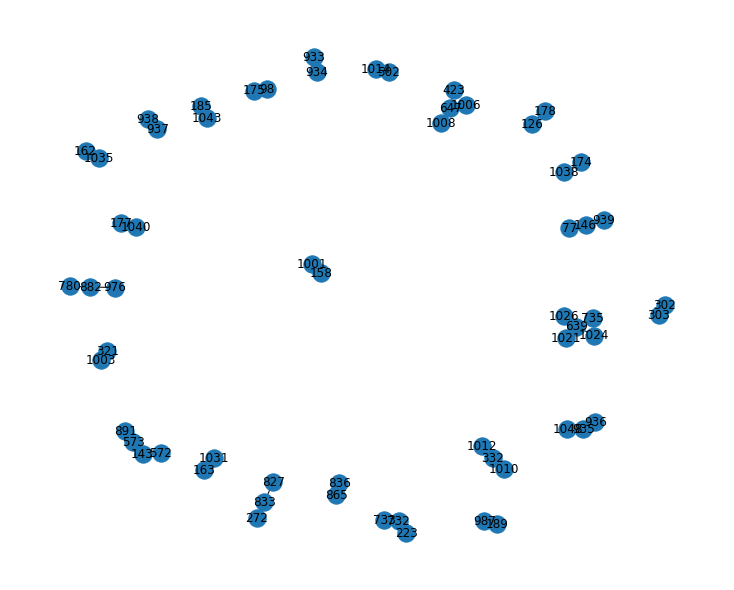

In [21]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8))
nx.draw(B, with_labels=True)

In [22]:
#B.nodes(data=True)

>**CREATE A NODELIST**

In [23]:
#instantiation an empty list
nodelist=[]
#iterate over the nodes n and their dictionary metadata D
for n,d in B.nodes(data=True):
    #for every node we create a new record dictionary
    node_data = dict()
    #we use node to uniquely identify by its ID: make sure not to overlap with the metadata keys
    node_data['node'] = n
    #we update the record dictionary with the metadata dictionary, using the node_data dot update(other_dict) method, 
    #which will take one dictionary and add in key-value pairs in the other dictionary
    node_data.update(d)
    nodelist.append(node_data)
#nodelist has been transform into a list of dictionary

In [24]:
df_nodes = pd.DataFrame(nodelist)

In [25]:
df_nodes

,node,name
0,865,"Castillo, Ernesto"
1,836,"Baeza, Florencio"
2,882,"Araya, Manuel"
3,780,"Bolli, Carlos"
4,833,"Valdes, Mario"
...,...,...
56,936,"Astorga, Raul"
57,1048,"Sandoval, Luis"
58,937,"Avendaño, Manuel"
59,938,"Inostroza, Lupercio"


In [26]:
pd.DataFrame(nodelist).to_csv('nodes.csv')

>**CREATE A EDGELIST** 

In [27]:
edgelist = []
for n1, n2, d in B.edges(data=True):
    # Initialize a dictionary that shows edge information: edgeinfo
    edgeinfo = {'node1':n1, 'node2':n2}
    # Update the edgeinfo data with the edge metadata
    edgeinfo.update(d)
    # Append the edgeinfo to the edgelist
    edgelist.append(edgeinfo)
# Create a pandas DataFrame of the edgelist: edge_df
df_edges = pd.DataFrame(edgelist)
print(df_edges.head())

  node1 node2
0   865   836
1   882   780
2   882   976
3   833   272
4   833   827


In [28]:
df_edges.head()

,node1,node2
0,865,836
1,882,780
2,882,976
3,833,272
4,833,827


>**DIGRAPHS**

In [29]:
#alternative 3: with metadadta
C = nx.from_pandas_edgelist(ch_01, 'challenging_id', 'challenged_id')
for box,row in ch_01.iterrows():
    C.nodes[row['challenging_id']]['name'] = row['challenging_name']
    C.nodes[row['challenged_id']]['name'] = row['challenged_name']
#print(B.nodes(data=True))
print(len(C.nodes()))

61


In [30]:
C.nodes(data=True)

NodeDataView({'865': {'name': 'Castillo, Ernesto'}, '836': {'name': 'Baeza, Florencio'}, '882': {'name': 'Araya, Manuel'}, '780': {'name': 'Bolli, Carlos'}, '833': {'name': 'Valdes, Mario'}, '272': {'name': 'Pérez, Amador'}, '976': {'name': 'Ortiz, Rafael'}, '827': {'name': 'Gallardo, Pedro'}, '189': {'name': 'Silva, Carlos'}, '987': {'name': 'Iñiguez, Mario'}, '302': {'name': 'Flores, Sara'}, '303': {'name': 'Farrafino, Clementina'}, '891': {'name': 'Huerta, Francisco'}, '573': {'name': 'Giaverini, Oscar'}, '158': {'name': 'Tapia, Julio'}, '1001': {'name': 'Inostroza, Ruperto'}, '1003': {'name': 'Alley, Juan'}, '321': {'name': 'Salinas, Juan'}, '647': {'name': 'Olguín, Humberto'}, '423': {'name': 'Valdenegro'}, '1006': {'name': 'Henriquez'}, '1008': {'name': 'Leiva'}, '332': {'name': 'Acosta, Luis J.'}, '1010': {'name': 'Molina, Erasmo'}, '1012': {'name': 'Parra, Routier'}, '502': {'name': 'Rios, Agustin'}, '1014': {'name': 'Arratia, Jose'}, '143': {'name': 'Caldera, Francisco'}, '572

In [35]:
for r, d in ch_01.iterrows():
    C.add_edge(d['challenging_id'], d['challenged_id'], date = d['Source year'])

In [38]:
print(len(C.edges()))

37


In [39]:
C.edges(data=True)

EdgeDataView([('865', '836', {'date': Timestamp('1928-03-02 00:00:00')}), ('882', '780', {'date': Timestamp('1928-04-05 00:00:00')}), ('882', '976', {'date': Timestamp('1928-04-08 00:00:00')}), ('833', '272', {'date': Timestamp('1928-04-08 00:00:00')}), ('833', '827', {'date': Timestamp('1928-04-29 00:00:00')}), ('189', '987', {'date': Timestamp('1924-02-01 00:00:00')}), ('302', '303', {'date': Timestamp('1924-03-07 00:00:00')}), ('891', '573', {'date': Timestamp('1924-02-01 00:00:00')}), ('573', '143', {'date': Timestamp('1924-04-04 00:00:00')}), ('158', '1001', {'date': Timestamp('1924-03-07 00:00:00')}), ('1003', '321', {'date': Timestamp('1924-03-07 00:00:00')}), ('647', '423', {'date': Timestamp('1924-03-07 00:00:00')}), ('647', '1006', {'date': Timestamp('1924-03-07 00:00:00')}), ('647', '1008', {'date': Timestamp('1924-03-07 00:00:00')}), ('332', '1010', {'date': Timestamp('1924-03-14 00:00:00')}), ('332', '1012', {'date': Timestamp('1924-03-14 00:00:00')}), ('502', '1014', {'da

In [32]:
#FFROM DATACAMP
from datetime import datetime
# Instantiate a new graph: G_sub
C_sub = nx.Graph()

# Add nodes from the original graph
C_sub.add_nodes_from(C.nodes(data=True))

# Add edges using a list comprehension with one conditional on the edge dates.
C_sub.add_edges_from([(u, v, d) for u, v, d in C.edges(data=True) if d['date'] < datetime(1930,1,1)])

In [33]:
print(len(C_sub.edges()))

37


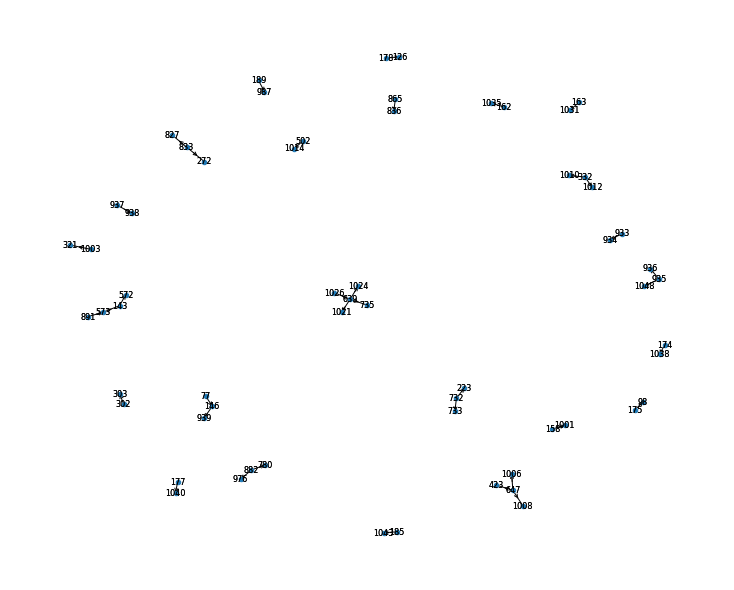

In [34]:
pos = nx.spring_layout(C)
figure(figsize=(10, 8))
nx.draw(C, pos, with_labels = True, node_size = 20, font_size=8)
nx.draw_networkx_edges(C, pos, arrows=True, arrowsize=8, arrowstyle="->")
nx.draw_networkx_labels(C, pos, font_size=8)
fig1 = plt.gcf()
fig1.savefig("/Users/hernanadasme/Documents/data_challenges/graph_3.jpg", dpi=600) 



{'865': Text(0.5024334414639294, -0.21937735622720045, '865'),
 '836': Text(0.47715740238511656, 0.2699559258264029, '836'),
 '882': Text(0.44966221913011933, 0.1795811984791788, '882'),
 '780': Text(0.9330996843783507, 0.09958290937634891, '780'),
 '833': Text(0.415244486504687, 0.2589419855009039, '833'),
 '272': Text(0.9051807071588486, 0.2507532044529706, '272'),
 '976': Text(-0.03439388357939678, 0.25503802760973054, '976'),
 '827': Text(-0.07465260642348667, 0.2529079792954907, '827'),
 '189': Text(0.5022955011224185, 0.2196552060268155, '189'),
 '987': Text(0.1260423074607552, 0.5335343041495636, '987'),
 '302': Text(0.4467145571259713, 0.31780394217405067, '302'),
 '303': Text(0.014207494884627478, 0.5480725374647883, '303'),
 '891': Text(0.4935990201471812, 0.6331684962769938, '891'),
 '573': Text(0.03999783033251328, 0.4467141609214439, '573'),
 '158': Text(0.28212071129709265, 0.4700536080362892, '158'),
 '1001': Text(-0.20640063521182472, 0.5079069047327027, '1001'),
 '1003

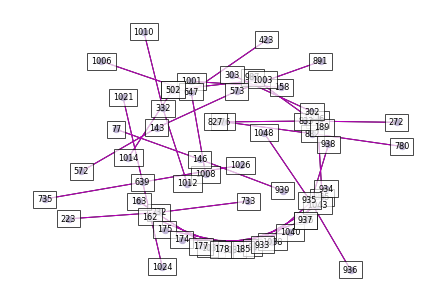

In [35]:
pos = nx.kamada_kawai_layout(C)
nx.draw(C, pos, with_labels = True, node_size = 40, font_size=5, node_color="#210070")
nx.draw_networkx_edges(C, pos, edge_color ="m")
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(C, pos, font_size=8, bbox=label_options)

>**DATACAMP EXAMPLE**

In [29]:
D = nx.Graph()
D.add_nodes_from(ch_01['challenging_id'], bipartite = 'challenger')
D.add_nodes_from(ch_01['challenged_id'], bipartite = 'challenged')

In [95]:
D.nodes(data=True)

NodeDataView({'865': {'bipartite': 'challenger', 'dc': 0.125}, '882': {'bipartite': 'challenged', 'dc': 0.25}, '833': {'bipartite': 'challenger', 'dc': 0.25}, '976': {'bipartite': 'challenger', 'dc': 0.125}, '189': {'bipartite': 'challenger', 'dc': 0.125}, '302': {'bipartite': 'challenger', 'dc': 0.125}, '891': {'bipartite': 'challenger', 'dc': 0.125}, '158': {'bipartite': 'challenger', 'dc': 0.125}, '1003': {'bipartite': 'challenger', 'dc': 0.125}, '647': {'bipartite': 'challenger', 'dc': 0.375}, '332': {'bipartite': 'challenger', 'dc': 0.25}, '502': {'bipartite': 'challenger', 'dc': 0.125}, '143': {'bipartite': 'challenger', 'dc': 0.25}, '77': {'bipartite': 'challenger', 'dc': 0.125}, '639': {'bipartite': 'challenger', 'dc': 0.5}, '732': {'bipartite': 'challenger', 'dc': 0.25}, '163': {'bipartite': 'challenger', 'dc': 0.125}, '162': {'bipartite': 'challenger', 'dc': 0.125}, '175': {'bipartite': 'challenger', 'dc': 0.125}, '174': {'bipartite': 'challenger', 'dc': 0.125}, '177': {'bipa

In [31]:
print(len(D.nodes()))

61


In [32]:
D.edges()
D.add_edges_from(zip(ch_01['challenging_id'], ch_01['challenged_id']))
len(D.edges())

37

In [33]:
D.edges()

EdgeView([('865', '836'), ('882', '780'), ('882', '976'), ('833', '272'), ('833', '827'), ('189', '987'), ('302', '303'), ('891', '573'), ('158', '1001'), ('1003', '321'), ('647', '423'), ('647', '1006'), ('647', '1008'), ('332', '1010'), ('332', '1012'), ('502', '1014'), ('143', '572'), ('143', '573'), ('77', '146'), ('639', '1021'), ('639', '735'), ('639', '1024'), ('639', '1026'), ('732', '223'), ('732', '733'), ('163', '1031'), ('162', '1035'), ('175', '98'), ('174', '1038'), ('177', '1040'), ('178', '126'), ('185', '1043'), ('933', '934'), ('935', '936'), ('935', '1048'), ('937', '938'), ('939', '146')])

>**BIPARTITE PROJECTIONS**

In [34]:
#Get the BOXERS partition's nodes: challeger_nodes and challenged_nodes
challenger_nodes = [n for n in D.nodes() if D.nodes[n]['bipartite'] == 'challenger']
challenged_nodes = [n for n in D.nodes() if D.nodes[n]['bipartite'] == 'challenged']

In [35]:
# Create the challenger and challenged nodes projection as a graph: challengerD and challengedD
challengerD = nx.bipartite.projected_graph(D, nodes=challenger_nodes) 
challengedD = nx.bipartite.projected_graph(D, nodes=challenged_nodes)

In [36]:
len(challengerD.nodes())


27

In [37]:
len(challengedD.nodes())

36

In [38]:
challengerD.nodes(data=True)

NodeDataView({'865': {'bipartite': 'challenger'}, '833': {'bipartite': 'challenger'}, '976': {'bipartite': 'challenger'}, '189': {'bipartite': 'challenger'}, '302': {'bipartite': 'challenger'}, '891': {'bipartite': 'challenger'}, '158': {'bipartite': 'challenger'}, '1003': {'bipartite': 'challenger'}, '647': {'bipartite': 'challenger'}, '332': {'bipartite': 'challenger'}, '502': {'bipartite': 'challenger'}, '143': {'bipartite': 'challenger'}, '77': {'bipartite': 'challenger'}, '639': {'bipartite': 'challenger'}, '732': {'bipartite': 'challenger'}, '163': {'bipartite': 'challenger'}, '162': {'bipartite': 'challenger'}, '175': {'bipartite': 'challenger'}, '174': {'bipartite': 'challenger'}, '177': {'bipartite': 'challenger'}, '178': {'bipartite': 'challenger'}, '185': {'bipartite': 'challenger'}, '933': {'bipartite': 'challenger'}, '935': {'bipartite': 'challenger'}, '937': {'bipartite': 'challenger'}, '939': {'bipartite': 'challenger'}, '780': {}})

In [39]:
challengedD.nodes(data=True)

NodeDataView({'882': {'bipartite': 'challenged'}, '836': {'bipartite': 'challenged'}, '780': {'bipartite': 'challenged'}, '272': {'bipartite': 'challenged'}, '827': {'bipartite': 'challenged'}, '987': {'bipartite': 'challenged'}, '303': {'bipartite': 'challenged'}, '573': {'bipartite': 'challenged'}, '1001': {'bipartite': 'challenged'}, '321': {'bipartite': 'challenged'}, '423': {'bipartite': 'challenged'}, '1006': {'bipartite': 'challenged'}, '1008': {'bipartite': 'challenged'}, '1010': {'bipartite': 'challenged'}, '1012': {'bipartite': 'challenged'}, '1014': {'bipartite': 'challenged'}, '572': {'bipartite': 'challenged'}, '146': {'bipartite': 'challenged'}, '1021': {'bipartite': 'challenged'}, '735': {'bipartite': 'challenged'}, '1024': {'bipartite': 'challenged'}, '1026': {'bipartite': 'challenged'}, '223': {'bipartite': 'challenged'}, '733': {'bipartite': 'challenged'}, '1031': {'bipartite': 'challenged'}, '1035': {'bipartite': 'challenged'}, '98': {'bipartite': 'challenged'}, '103

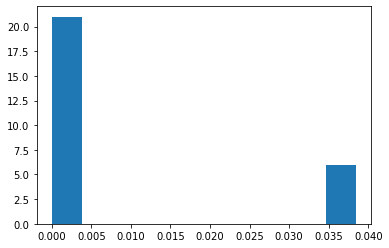

In [40]:
# Calculate the degree centrality using nx.degree_centrality: challenger_cent
challenger_cent = nx.degree_centrality(challengerD)

# Plot the histogram of degree centrality values
plt.hist(list(challenger_cent.values()))
#plt.yscale('log')  
plt.show() 

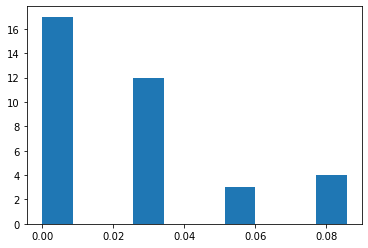

In [41]:
# Calculate the degree centrality using nx.degree_centrality: challenged_cent
challenged_cent = nx.degree_centrality(challengedD)

# Plot the histogram of degree centrality values
plt.hist(list(challenged_cent.values()))
#plt.yscale('log')  
plt.show() 

>**ADDING EDGES WITH DATA**

In [42]:
#for r, d in data.iterrows():
    #G.add_edge(d['student'], d['forum'], date=d['date'])

>**GRAPH FILTERING** 

>**VISUALIZATIONS**

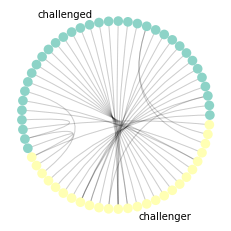

In [59]:
#To be most informative and communicative, a graph visualization should first prioritize node placement 
#in a fashion that makes sense.
from nxviz import CircosPlot
c = CircosPlot(D, node_grouping = 'bipartite', node_color = 'bipartite')
annotate.circos_group(D, group_by="bipartite")
fig2 = plt.gcf()
fig2.savefig("/Users/hernanadasme/Documents/data_challenges/graph_4.jpg", dpi=600) 


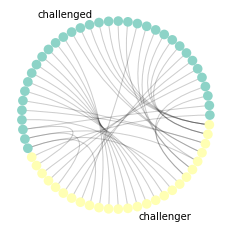

In [53]:
# Compute degree centrality scores of each node
dcs = nx.bipartite.degree_centrality(D, nodes='challenger')
for n, d in D.nodes(data=True):
    D.nodes[n]['dc'] = dcs[n]

# Create the CircosPlot object: c
c_1 = CircosPlot(D, node_color='bipartite', node_grouping='bipartite', node_order='dc')
annotate.circos_group(D, group_by="bipartite")
fig3 = plt.gcf()
fig3.savefig("/Users/hernanadasme/Documents/data_challenges/graph_4_cent.jpg", dpi=600) 

In [46]:
print(dcs)

{'185': 0.125, '882': 0.25, '573': 0.25, '1021': 0.125, '933': 0.125, '1008': 0.125, '177': 0.125, '1043': 0.125, '302': 0.125, '77': 0.125, '98': 0.125, '833': 0.25, '934': 0.125, '189': 0.125, '891': 0.125, '935': 0.25, '780': 0.125, '272': 0.125, '827': 0.125, '1014': 0.125, '987': 0.125, '1003': 0.125, '303': 0.125, '163': 0.125, '175': 0.125, '937': 0.125, '1010': 0.125, '146': 0.25, '1031': 0.125, '1040': 0.125, '733': 0.125, '976': 0.125, '143': 0.25, '639': 0.5, '1001': 0.125, '332': 0.25, '174': 0.125, '126': 0.125, '1012': 0.125, '1024': 0.125, '735': 0.125, '647': 0.375, '938': 0.125, '936': 0.125, '939': 0.125, '572': 0.125, '162': 0.125, '1038': 0.125, '178': 0.125, '502': 0.125, '1006': 0.125, '732': 0.25, '321': 0.125, '1035': 0.125, '423': 0.125, '865': 0.125, '836': 0.125, '1026': 0.125, '1048': 0.125, '223': 0.125, '158': 0.125}


In [47]:
D.nodes()

NodeView(('865', '882', '833', '976', '189', '302', '891', '158', '1003', '647', '332', '502', '143', '77', '639', '732', '163', '162', '175', '174', '177', '178', '185', '933', '935', '937', '939', '836', '780', '272', '827', '987', '303', '573', '1001', '321', '423', '1006', '1008', '1010', '1012', '1014', '572', '146', '1021', '735', '1024', '1026', '223', '733', '1031', '1035', '98', '1038', '1040', '126', '1043', '934', '936', '1048', '938'))

>**MATRIXPLOT**

In [ ]:
#Get the BOXERS partition's nodes: challeger_nodes and challenged_nodes
#challenger_nodes = [n for n in D.nodes() if D.nodes[n]['bipartite'] == 'challenger']
#challenged_nodes = [n for n in D.nodes() if D.nodes[n]['bipartite'] == 'challenged']

In [77]:
mat = nx.bipartite.biadjacency_matrix(D, row_order = challenger_nodes, column_order = challenged_nodes)
mat

<26x35 sparse matrix of type '<class 'numpy.int64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [79]:
matrix = mat @ mat.T

In [80]:
print(matrix)

  (0, 0)	1
  (1, 1)	2
  (2, 2)	1
  (3, 3)	1
  (4, 4)	1
  (5, 11)	1
  (5, 5)	1
  (6, 6)	1
  (7, 7)	1
  (8, 8)	3
  (9, 9)	2
  (10, 10)	1
  (11, 11)	2
  (11, 5)	1
  (12, 25)	1
  (12, 12)	1
  (13, 13)	4
  (14, 14)	2
  (15, 15)	1
  (16, 16)	1
  (17, 17)	1
  (18, 18)	1
  (19, 19)	1
  (20, 20)	1
  (21, 21)	1
  (22, 22)	1
  (23, 23)	2
  (24, 24)	1
  (25, 25)	1
  (25, 12)	1


In [76]:
#nv.matrix(D, group_by="bipartite", node_color_by="bipartite")

>**INVESTIGATING NODES OF INTEREST**

In [82]:
#noi = '639'
#degs = []
#for g in D:
    #degs.append(len(g.neighbors(noi)))
#plt.plot(degs)
#plt.show()